# Assignment 4

yg833

This is Assignment 4 of Homework 6 for Evening Session. For this assignment, I worked closely with S. Falk (sjf374) and R. MacWhinney (ram844). 

Notebook skeleton provided by Dr. Bianco (https://github.com/fedhere/PUI2018_fb55/blob/master/HW6_fb55_session2/citibikes_compare_distributions.ipynb)


** Skeleton of Assignment 4:**
    
    test if the distribution of 
    
    1) trip duration of bikers that ride during the day vs night
    
    2) age of bikers for trips originating in Manhattan and in Brooklyn
    
    are different. Use 3 tests: KS, Pearson's, Spearman's. 
    
    Use the scipy.stats functions scipy.stats.ks_2samp, scipy.stats.pearsonr, scipy.stats.spearmanr. 
    
    For the KS do the test with the entire dataset and with a subset 200 times smaller
    
    Choose a single significant threshold for the whole exercise. 
    
    For each test phrase the Null Hypothesis in words.
    
    Describe the return of the scipy function you use in each case.
    
    State the result in terms of rejection of the Null.

In [1]:
# my usual imports and setups
import pylab as pl
import pandas as pd
import numpy as np
#imports downloader, this is a py script in the folder
from getCitiBikeCSV import getCitiBikeCSV

%pylab inline

import os
#this makes my plots pretty! but it is totally not mandatory to do it
import json

# per directions from Skeleton of Assignment 4
import scipy.stats

# determine the hours for day vs night
dayNight = (5, 17)

Populating the interactive namespace from numpy and matplotlib


In [2]:
# setting environmental variable
os.environ["PUI2018"] = "%s/PUI2018"%os.getenv("HOME")
os.environ["PUIDATA"] = "%s/PUI2018/PUIdata"%os.getenv("HOME")
if os.getenv ('PUI2018') is None:
    print ("Must set env variable PUI2018")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2018")
print(os.getenv("PUIDATA"))

/nfshome/yg833/PUI2018/PUIdata


In [3]:
alpha = 0.05

# Read in data

I am reading in data from January 2015 with the function that I created getCitiBikeCSV. You are requested to use 2 months at least. It would be a good idea to use data from a colder and a warmer months, since there are more riders in the warm weather and ridership patterns may change with weather, temperature, etc. You should use data from multiple months, joining multiple datasets (thus addressing some systematic errors as well)


Pick months from the dataset to do - Jan 2015 and June 2015.


In [8]:
# download data: dataset 1 is from Jan 2015
Jan2015 = '201501'
getCitiBikeCSV(Jan2015)

file in place, you can continue


In [10]:
# read in data Jan
cbJan2015 = pd.read_csv(os.getenv("PUIDATA") + "/" + Jan2015 + '-citibike-tripdata.csv')
cbJan2015.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1


In [12]:
cbJan2015.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [15]:
# download data: dataset 1 is from June 2015
June2015 = '201506'
getCitiBikeCSV(June2015)

file in place, you can continue


In [16]:
#read in data June
cbJune2015 = pd.read_csv(os.getenv("PUIDATA") + "/" + June2015 + '-citibike-tripdata.csv')
cbJune2015.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1338,6/1/2015 0:00,6/1/2015 0:22,128,MacDougal St & Prince St,40.727103,-74.002971,2021,W 45 St & 8 Ave,40.759291,-73.988597,20721,Subscriber,1984.0,1
1,290,6/1/2015 0:00,6/1/2015 0:05,438,St Marks Pl & 1 Ave,40.727791,-73.985649,312,Allen St & E Houston St,40.722055,-73.989111,21606,Subscriber,1997.0,1
2,634,6/1/2015 0:01,6/1/2015 0:11,383,Greenwich Ave & Charles St,40.735238,-74.000271,388,W 26 St & 10 Ave,40.749718,-74.002950,16595,Subscriber,1993.0,1
3,159,6/1/2015 0:01,6/1/2015 0:04,361,Allen St & Hester St,40.716059,-73.991908,531,Forsyth St & Broome St,40.718939,-73.992663,16949,Subscriber,1981.0,1
4,1233,6/1/2015 0:02,6/1/2015 0:22,382,University Pl & E 14 St,40.734927,-73.992005,532,S 5 Pl & S 4 St,40.710451,-73.960876,17028,Customer,NaN,0


In [17]:
cbJune2015.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [19]:
df = pd.concat([cbJune2015, cbJan2015]) # concatenate the 2 months into 1 dataframe

In [24]:
# df is the dataframe where the content of the csv file is stored
df['date'] = pd.to_datetime(df['starttime'])

In [25]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,1338,6/1/2015 0:00,6/1/2015 0:22,128,MacDougal St & Prince St,40.727103,-74.002971,2021,W 45 St & 8 Ave,40.759291,-73.988597,20721,Subscriber,1984.0,1,2015-06-01 00:00:00
1,290,6/1/2015 0:00,6/1/2015 0:05,438,St Marks Pl & 1 Ave,40.727791,-73.985649,312,Allen St & E Houston St,40.722055,-73.989111,21606,Subscriber,1997.0,1,2015-06-01 00:00:00
2,634,6/1/2015 0:01,6/1/2015 0:11,383,Greenwich Ave & Charles St,40.735238,-74.000271,388,W 26 St & 10 Ave,40.749718,-74.002950,16595,Subscriber,1993.0,1,2015-06-01 00:01:00
3,159,6/1/2015 0:01,6/1/2015 0:04,361,Allen St & Hester St,40.716059,-73.991908,531,Forsyth St & Broome St,40.718939,-73.992663,16949,Subscriber,1981.0,1,2015-06-01 00:01:00
4,1233,6/1/2015 0:02,6/1/2015 0:22,382,University Pl & E 14 St,40.734927,-73.992005,532,S 5 Pl & S 4 St,40.710451,-73.960876,17028,Customer,NaN,0,2015-06-01 00:02:00


In [30]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')

In [27]:
len(df)

1226771

# SPLIT BY CATEGORY

## trip duration of bikers that ride during the day vs night:

H0: there is no statistical difference in the duration of bike ride distribution for day (6am- 6pm) and night (6:01pm to 5:59am) time rides - specifically looking at the start time of a ride

$$ \alpha = 0.05 $$

extracting the age happens in the cell below

In [52]:
df.reset_index(drop=True, inplace = True) # need to reindex and to set new index in place

In [53]:
df['usertype'].unique()
#why only subscriber?

array(['Subscriber', 'Customer'], dtype=object)

In [64]:
#df is the dataframe where the content of the csv file is stored
df['daytime'] = df['tripduration'][(df['usertype'] == 'Subscriber') & (df['date'].dt.hour >= 6) & (df['date'].dt.hour < 18)]
df['nighttime'] = df['tripduration'][(df['usertype'] == 'Subscriber') & ((df['date'].dt.hour >= 18) |  (df['date'].dt.hour <6))]

In [65]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,daytime,dur_night,nighttime
0,1338,6/1/2015 0:00,6/1/2015 0:22,128,MacDougal St & Prince St,40.727103,-74.002971,2021,W 45 St & 8 Ave,40.759291,-73.988597,20721,Subscriber,1984.0,1,2015-06-01 00:00:00,NaN,1338.0,1338.0
1,290,6/1/2015 0:00,6/1/2015 0:05,438,St Marks Pl & 1 Ave,40.727791,-73.985649,312,Allen St & E Houston St,40.722055,-73.989111,21606,Subscriber,1997.0,1,2015-06-01 00:00:00,NaN,290.0,290.0
2,634,6/1/2015 0:01,6/1/2015 0:11,383,Greenwich Ave & Charles St,40.735238,-74.000271,388,W 26 St & 10 Ave,40.749718,-74.002950,16595,Subscriber,1993.0,1,2015-06-01 00:01:00,NaN,634.0,634.0
3,159,6/1/2015 0:01,6/1/2015 0:04,361,Allen St & Hester St,40.716059,-73.991908,531,Forsyth St & Broome St,40.718939,-73.992663,16949,Subscriber,1981.0,1,2015-06-01 00:01:00,NaN,159.0,159.0
4,1233,6/1/2015 0:02,6/1/2015 0:22,382,University Pl & E 14 St,40.734927,-73.992005,532,S 5 Pl & S 4 St,40.710451,-73.960876,17028,Customer,NaN,0,2015-06-01 00:02:00,NaN,NaN,NaN


In [88]:
dayNightRiders_df = df[['daytime', 'nighttime']] # this is a temp data frame
dayNightRiders_df.head()

,daytime,nighttime
0,NaN,1338.0
1,NaN,290.0
2,NaN,634.0
3,NaN,159.0
4,NaN,NaN


In [89]:
dayNightRiders_df.describe() # there are a lot of NaNs
# let's split into different series

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,daytime,nighttime
count,753345.000000,337417.000000
mean,734.250235,751.442995
std,2427.034417,2136.701098
min,60.000000,60.000000
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,707490.000000,518019.000000


In [92]:
daySeries = dayNightRiders_df['daytime'].dropna()
daySeries.describe()

count    753345.000000
mean        734.250235
std        2427.034417
min          60.000000
25%         364.000000
50%         562.000000
75%         883.000000
max      707490.000000
Name: daytime, dtype: float64

In [95]:
daySeries.quantile([.25, .5, .997])

0.250     364.000
0.500     562.000
0.997    3695.968
Name: daytime, dtype: float64

In [94]:
nightSeries = dayNightRiders_df['nighttime'].dropna()
nightSeries.describe()

count    337417.000000
mean        751.442995
std        2136.701098
min          60.000000
25%         364.000000
50%         574.000000
75%         914.000000
max      518019.000000
Name: nighttime, dtype: float64

In [96]:
nightSeries.quantile([.25, .5, .997])

0.250     364.000
0.500     574.000
0.997    3508.752
Name: nighttime, dtype: float64

Text(0,0.5,'counts')

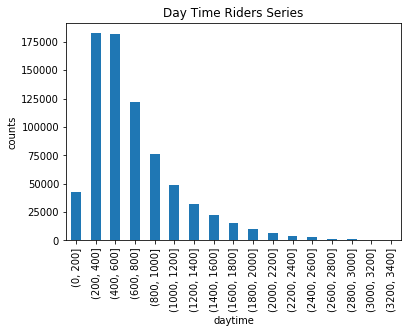

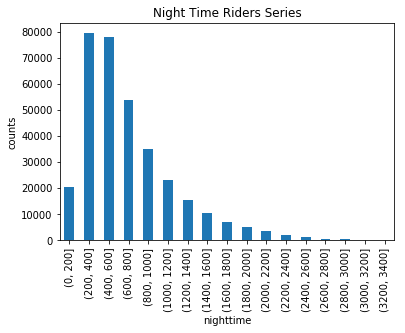

In [109]:
# plotting histogramswith pandas is a bitdifferent than with pylab
# this is a VERY USEFUL syntaxfor you to knonw!
bins = np.arange(0, 3600, 200)
axD = daySeries.groupby(pd.cut(daySeries, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axD.set_title("Day Time Riders Series")
axD.set_ylabel('counts')

axN = nightSeries.groupby(pd.cut(nightSeries, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False)
axN.set_title("Night Time Riders Series")
axN.set_ylabel('counts')

### Fig 1: Histogram of the day time and night time riders. 
Day time as between 6am and 6pm. Night time as between 6pm and 6am. While the shape of the 2 distributions look similiar. 
The counts are different with day time having higher counts.

              count_nonzero
daytime                    
(0, 200]           0.003228
(200, 400]         0.003812
(400, 600]         0.013898
(600, 800]         0.016877
(800, 1000]        0.014258
(1000, 1200]       0.009867
(1200, 1400]       0.006658
(1400, 1600]       0.004894
(1600, 1800]       0.003334
(1800, 2000]       0.001889
(2000, 2200]       0.000802
(2200, 2400]       0.000545
(2400, 2600]       0.000206
(2600, 2800]       0.000112
(2800, 3000]       0.000028
(3000, 3200]       0.000011
(3200, 3400]       0.000000


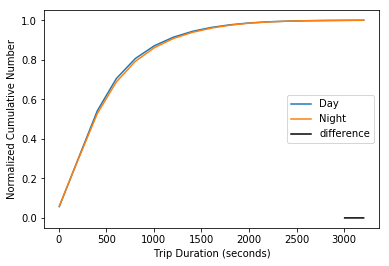

In [112]:
#use daySeries and nightSeries

csD=daySeries.groupby(pd.cut(daySeries, bins)).agg([count_nonzero]).cumsum()

csN=nightSeries.groupby(pd.cut(nightSeries, bins)).agg([count_nonzero]).cumsum()

print(np.abs(csD / csD.max()-csN / csN.max()))

pl.plot(bins[:-1] + 5, csD / csD.max(), label = "Day")
pl.plot(bins[:-1] + 5, csN / csN.max(), label = "Night")
pl.plot(bins[:-1] + 5, np.sqrt(csN / csN.max() - csD / csD.max())**2, 'k-',
        label = "difference")
pl.xlabel("Trip Duration (seconds)")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

### Fig 2: Cumulative distribution of CitiBike ride durations by time of day 

This graph shows the lack of difference between Day and Night distribution

### KS Tests to Compare 2 Samples

http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html

the KS test in scipy returns the p-value BUT make sure you understand what the NULL is! read the documentation carefully! what is the null hypothesis that you can/cannot reject?

In [115]:
ks = scipy.stats.ks_2samp(daySeries, nightSeries)
print(ks)

Ks_2sampResult(statistic=0.017669869577360831, pvalue=1.175722742205841e-63)
